ANTRACT FULL :  Evaluation
===============================

This notebook serves as evaluation for the face recognition system.

In [25]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
from sklearn.metrics import precision_recall_fscore_support as score

from SPARQLWrapper import SPARQLWrapper, JSON

from src import clusterize

In [26]:
ENDPOINT = "https://okapi.ina.fr/antract/api/saphir/sparql_search"
sparql = SPARQLWrapper(ENDPOINT)
sparql.setReturnFormat(JSON)

In [27]:
antract_full_path = '../antract_full_process/antract_full.tsv'

In [28]:
df = pd.read_csv(antract_full_path, delimiter='\t')
df

name  \
0                      Gaulle , Charles de   
1                         Auriol , Vincent   
2                      Philip d' Edimbourg   
3                             Elizabeth II   
4                         Schuman , Robert   
5                          Juin , Alphonse   
6                              Coty , René   
7                        Bidault , Georges   
8                Eisenhower , Dwight David   
9                    Khrouchtchev , Nikita   
10                          Truman , Harry   
11                         Bobet , Louison   
12                Naegelen , Marcel Edmond   
13             Couve de Murville , Maurice   
14                           Pleven , René   
15                       Adenauer , Konrad   
16                          Debré , Michel   
17                      Gaulle , Yvonne de   
18                       Auriol , Michelle   
19                 Chaban Delmas , Jacques   
20                 Elizabeth d' Angleterre   
21                           Faure , Edgar   
22                         Malraux , André   
23                     Churchill , Winston   
24                       Herriot , Edouard   
25                          Acheson , Dean   
26                      Spaak , Paul Henri   
27                      Johnson , Lyndon B   
28    Boulganine , Nikolaï Aleksandrovitch   
29                    Dulles , John Foster   
30                           Jazy , Michel   
31                    Monnerville , Gaston   
32                       Bourguiba , Habib   
33                          Eden , Anthony   
34                    Elizabeth-Reine Mère   
35                   Koenig , Marie Pierre   
36                        Messmer , Pierre   
37                            Moch , Jules   
38                   Rainier III de Monaco   
39                          Bevin , Ernest   
40                       Jacquinot , Louis   
41                      Pompidou , Georges   
42                                    Tito   
43                            Baudouin Ier   
44                   Charles d' Angleterre   
45                            Joxe , Louis   
46      Lattre de Tassigny , Jean Marie de   
47                      Nehru , Jawaharlal   
48                         Pinay , Antoine   
49                      Pineau , Christian   
50                            Frey , Roger   
51                        Herzog , Maurice   
52                        Lacoste , Robert   
53             Lamine , Pacha Sidi Mohamed   
54                         Ramadier , Paul   
55                      Vichinsky , Andrei   
56                    Béatrix des Pays Bas   
57                     Chevalier , Maurice   
58                               George VI   
59                        Gromyko , Andreï   
60                           Marie , André   
61                          Perillat , Guy   
62                        Queuille , Henri   
63                          Coppi , Fausto   
64                         Coty , Germaine   
65                      Le Troquer , André   
66                          Mimoun , Alain   
67                      Anquetil , Jacques   
68                            Clair , René   
69                       Defferre , Gaston   
70                    Goitschel , Marielle   
71                     Killy , Jean Claude   
72                         Mao , Tsé Toung   
73                           Marais , Jean   
74                            Mollet , Guy   
75                   Molotov , Viatcheslav   
76                          Morice , André   
77                    Nasser , Gamal Abdel   
78                     Auriol , Jacqueline   
79                 Jeanneney , Jean Marcel   
80                          Jouhaux , Léon   
81                         Laniel , Joseph   
82                    Mac Arthur , Douglas   
83                     Mac Millan , Harold   
84                            Mayer , René   
85                  Mendès France , Pierre   
86                       Pflimlin , 

In [8]:
# def get_sex(uri):
#     query = """%s
#         SELECT DISTINCT *
#         WHERE {
#         ?s a ina:PersonnePhysique ;
#             core:sex ?sex .
#         VALUES ?s {<%s>}
#         }""" % (PREFIXES, uri)
#     sparql.setQuery(query)
#     sparql.setReturnFormat(JSON)
#     res = sparql.query()._convertJSON()['results']['bindings']
#     if len(res) == 0:
#         return None
#     return res[0]['sex']['value']

# df['sex'] = df['ina'].apply(get_sex)
# df

In [9]:
# def get_note(uri):
#     query = """%s
#         SELECT DISTINCT *
#         WHERE {
#         ?s a ina:PersonnePhysique ;
#             ina:aPourNoteQualite ?note .
#         VALUES ?s {<%s>}
#         }""" % (PREFIXES, uri)
#     sparql.setQuery(query)
#     sparql.setReturnFormat(JSON)
#     res = sparql.query()._convertJSON()['results']['bindings']
#     if len(res) == 0:
#         return None
#     return res[0]['note']['value']

# df['note'] = df['ina'].apply(get_note)
# df

In [10]:
# import isni
# isni.SAVE_DIR = './isni/'

In [11]:
# def get_isni(name):
#     matches = isni.search(name, mtc='P')
#     if len(matches) == 0:
#         return None, None
    
#     m = matches[0]
#     return m.isni_uri, m.get_uri('wikidata')

In [12]:
# df[['isni', 'wikidata']] = df['name'].apply(get_isni).values.tolist()

In [13]:
# import wikidata

# def get_wikidata(name):
#     if ',' in name:
#         x = name.split(' ,')
#         name = (x[1]+' '+x[0]).strip()
#     name = name.replace("' ", "'")
    
#     match = wikidata.search(name)
#     if match is None:
#         return None
    
#     for x in match:
#         who = wikidata.get(x['id'])
#         if who.has_type('Q5'): # if person
#             date = who.get_time('P569') # birth date
#             if len(date) > 0 and date[0] > '+1850':
#                 return x['id']

#     return None

# df['wd'] = df['name'].apply(get_wikidata)
# df

In [14]:
# x = df[df['wd'].isna() & df['wikidata'].notna()]
# for y in x.index:
#     df.loc[y]['wd'] = df.loc[y]['wikidata'].replace('http://www.wikidata.org/entity/', '')

In [15]:
# nations = {
#     'France' : 'France',
#     'Royaume Uni' : 'United Kingdom',
#     'Etats Unis' : 'United States of America',
#     'URSS': 'Soviet Union',
#     'Italie' : 'Italy',
#     'Pays Bas' : 'Kingdom of the Netherlands',
#     'Tunisie' : 'Tunisia',
#     'Belgique': 'Belgium',
#     'Allemagne RF' :'West Germany',
#     'Monaco'  : 'Monaco',
#     'Chine République Populaire'  : "People's Republic of China",
#     'Suisse'  : 'Switzerland',
#     'Inde'   : 'India',
#     'Sénégal'     : 'Senegal',
#     'Egypte'  : 'Egypt',
#     'Algérie'  : 'Algeria',
#     'France, Algérie' : 'France',
#     'Vietnam' : 'Vietnam',
#     'Maroc' : 'Morocco',
#     'Allemagne' : 'Germany',
#     'Espagne' : 'Spain',
#     'Russie' : 'Soviet Union',
#     'Argentine' : 'Argentina' ,
#     'Ethiopie'   : 'Ethiopian Empire' ,
#     'Iran'      : 'Iran',
#     'Yougoslavie'    : 'Kingdom of Yugoslavia',
#     'Danemark' : 'Danish Realm'
# }

In [16]:
# import re
# def extract_nationality(string):
#     if not isinstance(string, str):
#         return None
#     ret =  re.split('\.| d[eu]s? |d\'', string)
#     if len(ret) < 2:
# #         print(ret)
#         return None
#     else:
#         x = ret[-1].strip()
#         if x[0].islower() or x.startswith('Cin'):
#             return None
#         if x == 'René Coty': 
#             return None
#         x = 'Royaume Uni' if 'Bretagne' in x or "Elizabeth" in x else x
#         x = 'Tunisie' if 'Tunis' in x else x

#         x = x.replace('\x7f', '')
#         x = x.replace('populaire', 'Populaire')
#         return nations[x]
    
# df['nationality'] = df['note'].apply(extract_nationality)

In [17]:
# def extract_nationality_wd(row):
#     code = row['wd']
#     nationality = '' if row['nationality'] is None else row['nationality']
        
#     if code is None:
#         return None
#     w =  wikidata.get(code)
#     if w is None: 
#         return None
#     nats = w.get_as_label('P27')
#     if len(nats) == 1:
#         return nats[0]
#     elif len(nats) > 1:
#         for x in nats:
#             if x in nationality:
#                 return x
#         return nats[0]
#     else:
#         return None
    
# df['nationality_wd'] = df[['wd', 'nationality']].apply(extract_nationality_wd, axis=1)

In [18]:
# df.loc[189]['nationality'] = 'Greece'

In [19]:
# df.loc[df[df['nationality'].isna() & df['nationality_wd'].isna()].index]['nationality'] = 'France'

In [20]:
# j = df[df['nationality'].isna() & df['nationality_wd'].notna()].index
# for i in j:
# #     df.loc[j]['nationality'] = df.loc[j]['nationality_wd']

In [21]:
# df.drop(['wikidata', 'nationality_wd'], axis=1, inplace=True)

In [25]:
# def get_date(row):
#     isn = row['isni']
#     wd = row['wd']
#     if wd is None:
#         if isn is None:
#             return None
#         x = isni.get(isn.split('/')[-1].split('.')[0])
#         return x.dates[0] if len(x.dates) > 0 else None
#     who = wikidata.get(wd)
#     date = who.get_time('P569') # birth date
#     if date is None:
#         return None
#     return date[0][1:5]
    
# df['date'] = df[['isni', 'wd']].apply(get_date, axis=1)

In [28]:
# def get_occupation(wd):
#     if wd is None:
#         return None
#     who = wikidata.get(wd)
#     return who.get_as_label('P106') # occupation
    
# df['occupation'] = df['wd'].apply(get_occupation)

In [59]:
# df2 = pd.read_csv('../antract_full_process/Participants_PAR.csv')
# for i, x in df2.iterrows():
#     name = x['word']
#     cat = x['category']
#     j = df[df['name']==name].index
#     df.loc[j, 'occupation'] = cat

In [9]:
# df[df['occupation'].isna()]

In [61]:
# df.to_csv(antract_full_path, sep="\t", index=False)

In [10]:
# df = pd.read_csv(antract_full_path, delimiter='\t')

In [5]:
from src.utils.media_fragment import convert_to_seconds_npt
with open('queries/antract_segment_by_person.rq', 'r') as f:
    query = f.read()
    
def pad_spaces(text):
    pad = 25 - len(text)
    return text + ''.join([' ' for _ in range(0,pad)])
    
def get_segments(person, name):
    q = query.replace('?person', '<%s>' % person)
    sparql.setQuery(q)
    results = sparql.query()._convertJSON()["results"]["bindings"]
    for r in results:
        for p in r:
            value = r[p]['value']
            if p in ['start', 'end']:
                value = convert_to_seconds_npt(re.sub(r"T(\d{2}:\d{2}:\d{2}).+", "\g<1>", value))
            if p == 'prop':
                value = re.split(r"[/#]", value)[-1]
            r[p] = value
        r['person'] = name
        r['person_uri'] = person
    print('- %s\t%s'%(pad_spaces(name), len(results)))
    
    
    return pd.DataFrame.from_dict([r for r in results if r['start'] < r['end']])


people_uris = [x for x in df['ina'].unique() if type(x) == str]
people_names = [df[df['ina']==x]['name'].to_list()[0] for x in people_uris]
        

print('Num. results per person:')
df_dataset = pd.concat([get_segments(uri, name) 
                     for uri, name in zip(people_uris, people_names)],
               ignore_index=True)
df_dataset   

Num. results per person:
- Gaulle , Charles de      	370
- Auriol , Vincent         	168
- Philip d' Edimbourg      	90
- Elizabeth II             	75
- Schuman , Robert         	84
- Juin , Alphonse          	55
- Coty , René              	102
- Bidault , Georges        	99
- Eisenhower , Dwight David	80
- Khrouchtchev , Nikita    	56
- Truman , Harry           	63
- Bobet , Louison          	74
- Naegelen , Marcel Edmond 	20
- Couve de Murville , Maurice	78
- Pleven , René            	61
- Adenauer , Konrad        	60
- Debré , Michel           	65
- Gaulle , Yvonne de       	64
- Auriol , Michelle        	41
- Chaban Delmas , Jacques  	49
- Elizabeth d' Angleterre  	40
- Faure , Edgar            	41
- Malraux , André          	52
- Churchill , Winston      	48
- Herriot , Edouard        	42
- Acheson , Dean           	24
- Spaak , Paul Henri       	40
- Boulganine , Nikolaï Aleksandrovitch	24
- Dulles , John Foster     	38
- Jazy , Michel            	23
- Monnerville , Gaston     	3

media  \
0     http://www.ina.fr/media/AFE86004002   
1     http://www.ina.fr/media/AFE86004426   
2     http://www.ina.fr/media/AFE86003754   
3     http://www.ina.fr/media/AFE86003816   
4     http://www.ina.fr/media/AFE86004083   
...                                   ...   
5408  http://www.ina.fr/media/AFE86004813   
5409  http://www.ina.fr/media/AFE86004739   
5410  http://www.ina.fr/media/AFE86003530   
5411  http://www.ina.fr/media/AFE86004691   
5412  http://www.ina.fr/media/AFE86004813   

                                                  title  start    end  \
0                    La visite de Monsieur Cyrankiewicz  105.0  160.0   
1     Le général De Gaulle décore des chefs et des r...  684.0  751.0   
2     Le voyage du Général De Gaulle  et les dramati...  276.0  588.0   
3       La rencontre De Gaulle - Adenauer à Baden Baden   13.0   38.0   
4     Le lancement du Redoutable, premier sous marin...  163.0  225.0   
...                                                 ...    ...    ...   
5408                  CRITERIUM DES AS, COURSE CYCLISTE  377.0  417.0   
5409        L'Italien Bevilacqua remporte Paris-Roubaix  150.0  216.0   
5410  CHAMPIONNAT DU MONDE CYCLISTE -  ROUTIERS PROF...   14.0   66.0   
5411           Cyclisme. Paris - Tours : 44 ème édition   12.0   58.0   
5412                                  SLALOM DES CANOES  319.0  375.0   

                            url                   person  \
0     /Media/AF/AFE86004002.mp4      Gaulle , Charles de   
1     /Media/AF/AFE86004426.mp4      Gaulle , Charles de   
2     /Media/AF/AFE86003754.mp4      Gaulle , Charles de   
3     /Media/AF/AFE86003816.mp4      Gaulle , Charles de   
4     /Media/AF/AFE86004083.mp4      Gaulle , Charles de   
...                         ...                      ...   
5408  /Media/AF/AFE86004813.mp4  Van Steenbergen , Henri   
5409  /Media/AF/AFE86004739.mp4  Van Steenbergen , Henri   
5410  /Media/AF/AFE86003530.mp4  Van Steenbergen , Henri   
5411  /Media/AF/AFE86004691.mp4  Van Steenbergen , Henri   
5412  /Media/AF/AFE86004813.mp4  Van Steenbergen , Henri   

                                           person_uri  
0     http://www.ina.fr/thesaurus/pp/concept_10075863  
1     http://www.ina.fr/thesaurus/pp/concept_10075863  
2     http://www.ina.fr/thesaurus/pp/concept_10075863  
3     http://www.ina.fr/thesaurus/pp/concept_10075863  
4     http://www.ina.fr/thesaurus/pp/concept_10075863  
...                                               ...  
5408  http://www.ina.fr/thesaurus/pp/concept_10132944  
5409  http://www.ina.fr/thesaurus/pp/concept_10132944  
5410  http://www.ina.fr/thesaurus/pp/concept_10132944  
5411  http://www.ina.fr/thesaurus/pp/concept_10132944  
5412  http://www.ina.fr/thesaurus/pp/concept_10132944  

[5413 rows x 7 columns]

In [17]:
with open('queries/antract_year_by_media.rq', 'r') as f:
    query = f.read()

In [14]:
# df_dataset['label'] = df_dataset['person'].apply(lambda x: model_names[str(x)])
def get_year(media):
    q = query.replace('?media', f"<{media}>")
    sparql.setQuery(q)
    results = sparql.query()._convertJSON()["results"]["bindings"]
    if len(results) == 0:
        return None
    date = results[0]['date']['value']
    return int(date[0:4])

# df_dataset['year'] = df_dataset['media'].apply(get_year)

In [34]:
l = len(df_dataset)
df_dataset['predicted'] = np.zeros(l)
df_dataset['confidence'] = np.zeros(l)
durations = []

for i, x in df_dataset.iterrows():
    cur = get_by_media(x['media'])
    if cur is None:
        print('Not found '+ x['media'])
    cur = cur['tracks']
    start = x['start']
    end = x['end']
    b = np.arange(start, end)
    durations.append(end-start)

    found = False
    for c in cur:
        a = np.arange(np.floor(c['start_npt']-5), np.ceil(c['end_npt']+5))

        if len(np.intersect1d(a,b)) > 0:
            df_dataset.loc[i, 'predicted'] = c['name']
            df_dataset.loc[i, 'confidence'] = float(c['confidence'])

            if x['person'] == c['name']:
                break

df_dataset['duration'] = durations

In [35]:
antract_full_dataset_pred = '../antract_full_process/antract_full_dataset_pred.tsv'
df_dataset.to_csv(antract_full_dataset_pred, sep="\t", index=False)

In [10]:
antract_full_dataset_pred = '../antract_full_process/antract_full_dataset_pred.tsv'
df_dataset = pd.read_csv(antract_full_dataset_pred, delimiter='\t')

In [20]:
pd.set_option('display.max_rows', 10)

df_dataset

media  \
0     http://www.ina.fr/media/AFE86004002   
1     http://www.ina.fr/media/AFE86004426   
2     http://www.ina.fr/media/AFE86003754   
3     http://www.ina.fr/media/AFE86003816   
4     http://www.ina.fr/media/AFE86004083   
...                                   ...   
5408  http://www.ina.fr/media/AFE86004813   
5409  http://www.ina.fr/media/AFE86004739   
5410  http://www.ina.fr/media/AFE86003530   
5411  http://www.ina.fr/media/AFE86004691   
5412  http://www.ina.fr/media/AFE86004813   

                                                  title  start    end  \
0                    La visite de Monsieur Cyrankiewicz  105.0  160.0   
1     Le général De Gaulle décore des chefs et des r...  684.0  751.0   
2     Le voyage du Général De Gaulle  et les dramati...  276.0  588.0   
3       La rencontre De Gaulle - Adenauer à Baden Baden   13.0   38.0   
4     Le lancement du Redoutable, premier sous marin...  163.0  225.0   
...                                                 ...    ...    ...   
5408                  CRITERIUM DES AS, COURSE CYCLISTE  377.0  417.0   
5409        L'Italien Bevilacqua remporte Paris-Roubaix  150.0  216.0   
5410  CHAMPIONNAT DU MONDE CYCLISTE -  ROUTIERS PROF...   14.0   66.0   
5411           Cyclisme. Paris - Tours : 44 ème édition   12.0   58.0   
5412                                  SLALOM DES CANOES  319.0  375.0   

                            url                   person  \
0     /Media/AF/AFE86004002.mp4      Gaulle , Charles de   
1     /Media/AF/AFE86004426.mp4      Gaulle , Charles de   
2     /Media/AF/AFE86003754.mp4      Gaulle , Charles de   
3     /Media/AF/AFE86003816.mp4      Gaulle , Charles de   
4     /Media/AF/AFE86004083.mp4      Gaulle , Charles de   
...                         ...                      ...   
5408  /Media/AF/AFE86004813.mp4  Van Steenbergen , Henri   
5409  /Media/AF/AFE86004739.mp4  Van Steenbergen , Henri   
5410  /Media/AF/AFE86003530.mp4  Van Steenbergen , Henri   
5411  /Media/AF/AFE86004691.mp4  Van Steenbergen , Henri   
5412  /Media/AF/AFE86004813.mp4  Van Steenbergen , Henri   

                                           person_uri    year  \
0     http://www.ina.fr/thesaurus/pp/concept_10075863  1965.0   
1     http://www.ina.fr/thesaurus/pp/concept_10075863  1945.0   
2     http://www.ina.fr/thesaurus/pp/concept_10075863  1960.0   
3     http://www.ina.fr/thesaurus/pp/concept_10075863  1962.0   
4     http://www.ina.fr/thesaurus/pp/concept_10075863  1967.0   
...                                               ...     ...   
5408  http://www.ina.fr/thesaurus/pp/concept_10132944  1952.0   
5409  http://www.ina.fr/thesaurus/pp/concept_10132944  1951.0   
5410  http://www.ina.fr/thesaurus/pp/concept_10132944  1956.0   
5411  http://www.ina.fr/thesaurus/pp/concept_10132944  1950.0   
5412  http://www.ina.fr/thesaurus/pp/concept_10132944  1952.0   

               predicted  confidence  duration  
0                    0.0    0.000000      55.0  
1                    0.0    0.000000      67.0  
2                    0.0    0.000000     312.0  
3                    0.0    0.000000      25.0  
4     Gauthier , Bernard    0.938264      62.0  
...                  ...         ...       ...  
5408  Gauthier , Bernard    0.751678      40.0  
5409                 0.0    0.000000      66.0  
5410                 0.0    0.000000      52.0  
5411  Gauthier , Bernard    0.814918      46.0  
5412  Gauthier , Bernard    0.868077      56.0  

[5413 rows x 11 columns]

Load computation results (obtained using `antract_bulk_load.py`)

In [25]:
len(df_dataset['media'].unique())

1117

In [11]:
proc_folder = '../antract_full_process/processed/'
data = []
for x in os.listdir(proc_folder):
    if not x.endswith('.json'):
        continue 

    with open(os.path.join(proc_folder, x), 'r') as f:
        data.append(json.load(f))
        
for x in data:
    for t in x['tracks']:
        if t['name'] == 'Roncalli , Angelo Giuseppe':
            t['name'] = 'Jean XXIII'

In [80]:
def area(bb):
    return bb['w']*bb['h']

filtered = [t for d in data for t in d['tracks'] if t['name'] == 'Coty , René']
dimensions = np.array([area(t['bounding']) for t in filtered])
print(len(dimensions))
print(dimensions.mean())
durations = np.array([t['end_npt'] - t['start_npt'] for t in filtered])
print(durations.mean())

14
14068.857142857143
6.785714285714286


In [81]:
filtered = [t for d in data for t in d['tracks'] if t['name'] == 'Auriol , Vincent']
dimensions = np.array([area(t['bounding']) for t in filtered])
print(len(dimensions))
print(dimensions.mean())
durations = np.array([t['end_npt'] - t['start_npt'] for t in filtered])
print(durations.mean())

8
12861.25
3.25


In [9]:
# pdc = ['Ramadier , Paul',
#  'Schuman , Robert',
#  'Marie , André',
#  'Schuman , Robert',
#  'Queuille , Henri',
#  'Bidault , Georges',
#  'Queuille , Henri',
#  'Pleven , René',
#  'Queuille , Henri',
#  'Pleven , René',
#  'Faure , Edgar',
#  'Pinay , Antoine',
#  'Mayer , René',
#  'Laniel , Joseph',
#  'Laniel , Joseph',
#  'Mendès France , Pierre',
#  'Faure , Edgar',
#  'Mollet , Guy',
#  'Bourgès-Maunoury , Maurice',
#  'Gaillard , Félix',
#  'Pflimlin , Pierre',
#  'Gaulle , Charles de']
# pdc

In [7]:
# from tqdm import tqdm

# # add year
# for d in tqdm(data):
#     x = df_dataset[df_dataset['media'] == d['media']]
#     if len(x) > 0:
#         d['year'] = x['year'].to_list()[0]
#     else:
#         d['year'] = get_year(d['media'])

In [8]:
# pdc2 = ["Schuman , Robert" , "Mendès France , Pierre" ,
#         "Mollet , Guy" ,
#         "Gaulle , Charles de"]

# for p in pdc2:
#     filtered = [(t, d['year']) for d in data for t in d['tracks'] if t['name'] == p and d['year'] < 1958 and d['year'] > 1945]
#     print(p)
#     years = [year for x, year in filtered]
#     print(np.unique(years, return_counts=True))

In [6]:
# print('\t\t\tAppearences\tAvg. Dimension\tAvg. Duration')
# for p in pdc:
#     filtered = [t for d in data for t in d['tracks'] if t['name'] == p and d['year'] < 1958 and d['year'] > 1945]
#     dimensions = np.array([area(t['bounding']) for t in filtered])
#     durations = np.array([t['end_npt'] - t['start_npt'] for t in filtered])
    
#     print(f'{p}\t\t{len(filtered)}\t{dimensions.mean()}\t{durations.mean()}')

In [41]:
classes = [str(p) for p in df_dataset['person'].unique()]
res = []
for c in classes:
    filtered = [t for d in data for t in d['tracks'] if t['name'] == c]
    dimensions = np.array([area(t['bounding']) for t in filtered])
    dimensions = np.sort(dimensions)[1:-1]
    durations = np.array([t['end_npt'] - t['start_npt'] for t in filtered])
    durations = np.sort(durations)[1:-1]

    res.append([c,durations.mean(), dimensions.mean(), len(filtered)])

df_timings = pd.DataFrame.from_records(res, columns=['name', 'duration', 'area', 'support'])
df_timings[df_timings['support']>10].sort_values('support', ascending=False)

/Users/pasquale/opt/anaconda3/envs/facerec/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/Users/pasquale/opt/anaconda3/envs/facerec/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


name   duration          area  support
173           Gauthier , Bernard   1.408437   9394.454934    25531
0            Gaulle , Charles de  13.126582  15551.253165       81
71               Mao , Tsé Toung   1.462687  14223.761194       69
40            Pompidou , Georges   1.838710   9166.161290       33
199                Chou , En Lai   1.806452  11239.354839       33
69          Goitschel , Marielle   2.066667  19081.733333       32
166     Montgomery , Bernard Law   1.360000  11040.920000       27
103      Senghor , Léopold Sédar   1.400000  11307.160000       27
84        Mendès France , Pierre   3.000000  24679.111111       20
2            Philip d' Edimbourg   4.266667  12607.600000       17
156  Margaret Rose d' Angleterre   2.071429  13562.857143       16
176              Grace de Monaco   1.769231  17093.769231       15
114    Kennedy , John Fitzgerald   2.692308  14261.000000       15
4               Schuman , Robert   3.615385  16918.230769       15
101              Nixon , Richard   4.333333  15574.000000       14
8      Eisenhower , Dwight David   1.666667  13091.083333       14
6                    Coty , René   2.333333  11466.666667       14
23           Churchill , Winston   1.833333  23926.666667       14
72                 Marais , Jean   2.083333   9202.750000       14
9          Khrouchtchev , Nikita   1.727273  12013.363636       13
3                   Elizabeth II   2.000000   8260.727273       13
37         Rainier III de Monaco   2.100000   7400.600000       12
15             Adenauer , Konrad   1.900000  11761.900000       12
92               Carol , Martine   2.444444  21208.555556       11
73                  Mollet , Guy   4.555556   9108.666667       11
111             Gaillard , Félix   3.000000  15795.333333       11

In [30]:
df

name  \
0                      Gaulle , Charles de   
1                         Auriol , Vincent   
2                      Philip d' Edimbourg   
3                             Elizabeth II   
4                         Schuman , Robert   
5                          Juin , Alphonse   
6                              Coty , René   
7                        Bidault , Georges   
8                Eisenhower , Dwight David   
9                    Khrouchtchev , Nikita   
10                          Truman , Harry   
11                         Bobet , Louison   
12                Naegelen , Marcel Edmond   
13             Couve de Murville , Maurice   
14                           Pleven , René   
15                       Adenauer , Konrad   
16                          Debré , Michel   
17                      Gaulle , Yvonne de   
18                       Auriol , Michelle   
19                 Chaban Delmas , Jacques   
20                 Elizabeth d' Angleterre   
21                           Faure , Edgar   
22                         Malraux , André   
23                     Churchill , Winston   
24                       Herriot , Edouard   
25                          Acheson , Dean   
26                      Spaak , Paul Henri   
27                      Johnson , Lyndon B   
28    Boulganine , Nikolaï Aleksandrovitch   
29                    Dulles , John Foster   
30                           Jazy , Michel   
31                    Monnerville , Gaston   
32                       Bourguiba , Habib   
33                          Eden , Anthony   
34                    Elizabeth-Reine Mère   
35                   Koenig , Marie Pierre   
36                        Messmer , Pierre   
37                            Moch , Jules   
38                   Rainier III de Monaco   
39                          Bevin , Ernest   
40                       Jacquinot , Louis   
41                      Pompidou , Georges   
42                                    Tito   
43                            Baudouin Ier   
44                   Charles d' Angleterre   
45                            Joxe , Louis   
46      Lattre de Tassigny , Jean Marie de   
47                      Nehru , Jawaharlal   
48                         Pinay , Antoine   
49                      Pineau , Christian   
50                            Frey , Roger   
51                        Herzog , Maurice   
52                        Lacoste , Robert   
53             Lamine , Pacha Sidi Mohamed   
54                         Ramadier , Paul   
55                      Vichinsky , Andrei   
56                    Béatrix des Pays Bas   
57                     Chevalier , Maurice   
58                               George VI   
59                        Gromyko , Andreï   
60                           Marie , André   
61                          Perillat , Guy   
62                        Queuille , Henri   
63                          Coppi , Fausto   
64                         Coty , Germaine   
65                      Le Troquer , André   
66                          Mimoun , Alain   
67                      Anquetil , Jacques   
68                            Clair , René   
69                       Defferre , Gaston   
70                    Goitschel , Marielle   
71                     Killy , Jean Claude   
72                         Mao , Tsé Toung   
73                           Marais , Jean   
74                            Mollet , Guy   
75                   Molotov , Viatcheslav   
76                          Morice , André   
77                    Nasser , Gamal Abdel   
78                     Auriol , Jacqueline   
79                 Jeanneney , Jean Marcel   
80                          Jouhaux , Léon   
81                         Laniel , Joseph   
82                    Mac Arthur , Douglas   
83                     Mac Millan , Harold   
84                            Mayer , René   
85                  Mendès France , Pierre   
86                       Pflimlin , 

In [12]:
def get_by_media(me):
    r = [x for x in data if x['media'] == me]
    return r[0] if len(r) > 0 else None

In [13]:
classes = [str(p) for p in df_dataset['person'].unique()]
pd.set_option('display.max_rows', None)

def compute_metrics(threshold=0.5, year=None):
    dts = df_dataset
    if year is not None:
        dts = df_dataset[df_dataset['year'].between(year -5, year+5)]
        
    label = np.array([str(p) for p in dts['person']])
    predicted = np.array([str(p['predicted']) if p['confidence'] > threshold else '0' for i, p in dts.iterrows() ])
    
    return score(label, predicted, labels=classes, zero_division=1)

@widgets.interact(threshold=widgets.FloatSlider(min=0, max=1, step=0.05, value=0.60), 
                  year=widgets.fixed(None))
def show_metrics(threshold=0.5, year=None):
    precision, recall, fscore, support = compute_metrics(threshold, year)
    
    dfx = pd.DataFrame()
    dfx['index']= classes
    dfx['precision'] =  precision
    dfx['recall'] =  recall
    dfx['fscore'] =  fscore
    dfx['support'] =  support

    tot = {
        'index' : 'tot (excluded 0)',
        'precision': np.average(precision[0:-1], weights=support[0:-1]),
        'recall' : np.average(recall[0:-1], weights=support[0:-1]),
        'fscore' : np.average(fscore[0:-1], weights=support[0:-1]),
        'support' : np.sum(support)
    }
    dfx = dfx.append(pd.DataFrame(tot, index=[7]))
    return dfx

interactive(children=(FloatSlider(value=0.6, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [17]:
import math


def get_age(x):
    year = x['year']
    person = x['predicted']
    
    if person == 0.0 or person == '0.0':
        return 0
    
    date = df[df['name'] == person]['date'].tolist()[0]
    if math.isnan(date):
        return 0
    
    return int(int(year) - int(date))

df_dataset['age'] = df_dataset[['year','predicted']].apply(get_age, axis=1)
df_dataset

media  \
0     http://www.ina.fr/media/AFE86004002   
1     http://www.ina.fr/media/AFE86004426   
2     http://www.ina.fr/media/AFE86003754   
3     http://www.ina.fr/media/AFE86003816   
4     http://www.ina.fr/media/AFE86004083   
5     http://www.ina.fr/media/AFE86003865   
6     http://www.ina.fr/media/AFE86004467   
7     http://www.ina.fr/media/AFE86003809   
8     http://www.ina.fr/media/AFE86003861   
9     http://www.ina.fr/media/AFE86003711   
10    http://www.ina.fr/media/AFE86004431   
11    http://www.ina.fr/media/AFE86004067   
12    http://www.ina.fr/media/AFE86003817   
13    http://www.ina.fr/media/AFE86003687   
14    http://www.ina.fr/media/AFE86003799   
15    http://www.ina.fr/media/AFE86003776   
16    http://www.ina.fr/media/AFE86004586   
17    http://www.ina.fr/media/AFE86004127   
18    http://www.ina.fr/media/AFE86003841   
19    http://www.ina.fr/media/AFE86003955   
20    http://www.ina.fr/media/AFE86004010   
21    http://www.ina.fr/media/AFE86003887   
22    http://www.ina.fr/media/AFE86003781   
23    http://www.ina.fr/media/AFE86004143   
24    http://www.ina.fr/media/AFE86003628   
25    http://www.ina.fr/media/AFE86004086   
26    http://www.ina.fr/media/AFE86003848   
27    http://www.ina.fr/media/AFE86004451   
28    http://www.ina.fr/media/AFE86004145   
29    http://www.ina.fr/media/AFE86003883   
30    http://www.ina.fr/media/AFE86003858   
31    http://www.ina.fr/media/AFE86004605   
32    http://www.ina.fr/media/AFE86003670   
33    http://www.ina.fr/media/AFE86003625   
34    http://www.ina.fr/media/AFE86004150   
35    http://www.ina.fr/media/AFE86004037   
36    http://www.ina.fr/media/AFE86004129   
37    http://www.ina.fr/media/AFE86004084   
38    http://www.ina.fr/media/AFE86004006   
39    http://www.ina.fr/media/AFE86004023   
40    http://www.ina.fr/media/AFE86004613   
41    http://www.ina.fr/media/AFE86004002   
42    http://www.ina.fr/media/AFE86003941   
43    http://www.ina.fr/media/AFE86003624   
44    http://www.ina.fr/media/AFE86003850   
45    http://www.ina.fr/media/AFE86004088   
46    http://www.ina.fr/media/AFE86003628   
47    http://www.ina.fr/media/AFE86003880   
48    http://www.ina.fr/media/AFE86004094   
49    http://www.ina.fr/media/AFE86004416   
50    http://www.ina.fr/media/AFE86003830   
51    http://www.ina.fr/media/AFE86004144   
52    http://www.ina.fr/media/AFE86003935   
53    http://www.ina.fr/media/AFE86004074   
54    http://www.ina.fr/media/AFE86003969   
55    http://www.ina.fr/media/AFE86003680   
56    http://www.ina.fr/media/AFE86003716   
57    http://www.ina.fr/media/AFE86004036   
58    http://www.ina.fr/media/AFE86003911   
59    http://www.ina.fr/media/AFE86003677   
60    http://www.ina.fr/media/AFE86004459   
61    http://www.ina.fr/media/AFE86004179   
62    http://www.ina.fr/media/AFE86003671   
63    http://www.ina.fr/media/AFE86003802   
64    http://www.ina.fr/media/AFE86004102   
65    http://www.ina.fr/media/AFE86003880   
66    http://www.ina.fr/media/AFE86004436   
67    http://www.ina.fr/media/AFE86003829   
68    http://www.ina.fr/media/AFE86004584   
69    http://www.ina.fr/media/AFE86004749   
70    http://www.ina.fr/media/AFE86003637   
71    http://www.ina.fr/media/AFE86003626   
72    http://www.ina.fr/media/AFE86003889   
73    http://www.ina.fr/media/AFE86003702   
74    http://www.ina.fr/media/AFE86003709   
75    http://www.ina.fr/media/AFE86003748   
76    http://www.ina.fr/media/AFE86004025   
77    http://www.ina.fr/media/AFE86003793   
78    http://www.ina.fr/media/AFE86003821   
79    http://www.ina.fr/media/AFE86003824   
80    http://www.ina.fr/media/AFE86003679   
81    http://www.ina.fr/media/AFE86004035   
82    http://www.ina.fr/media/AFE86003732   
83    http://www.ina.fr/media/AFE86003704   
84    http://www.ina.fr/media/AFE86004132   
85    http://www.ina.fr/media/AFE86003851   
86    http://www.ina.fr/media/AFE86004142   
87    http://www.ina.fr/media/AFE86003859   
88    http://www.ina.fr/media/A

In [14]:
precision = []
recall = []
fscore = []

_range = np.arange(0, 0.8, 0.05)
for threshold in _range:
    p, r, f, support = compute_metrics(threshold)
    precision.append(np.average(p[0:-1], weights=support[0:-1]))
    recall.append(np.average(r[0:-1], weights=support[0:-1]))
    fscore.append(np.average(f[0:-1], weights=support[0:-1]))

In [15]:
np.argmax(fscore) * 0.05

0.0

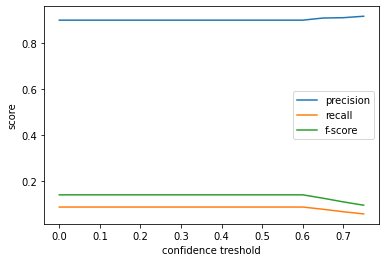

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(_range, precision, label='precision')  # Plot some data on the axes.
ax.plot(_range, recall, label='recall')  # Plot more data on the axes...
ax.plot(_range, fscore, label='f-score')  # ... and some more.
ax.set_xlabel('confidence treshold')  # Add an x-label to the axes.
ax.set_ylabel('score')  # Add a y-label to the axes.
ax.legend()  # Add a legend
plt.savefig('plot/antract_facerec_precision.pdf')  

0.6 looks like the best threshold

In [17]:
show_metrics(0.6).describe()

precision      recall      fscore      support
count  212.000000  212.000000  212.000000   212.000000
mean     0.900181    0.094297    0.145284    51.066038
std      0.219436    0.112774    0.154046   371.289511
min      0.000000    0.000000    0.000000     1.000000
25%      1.000000    0.000000    0.000000    13.000000
50%      1.000000    0.066667    0.121324    18.000000
75%      1.000000    0.153846    0.258766    29.250000
max      1.000000    0.600000    0.714286  5413.000000

In [23]:
with open('plot/latex_antract_full.txt', 'w') as f:
    show_metrics(0.6).to_latex(f, index=False)

In [41]:
def filter_by(prop):
    def filter_with(what):
        return df_dataset[df_dataset[prop] == what]
    return filter_with

def filter_by_with(prop, what):
    return df_dataset[df_dataset[prop] == what]

    
widgets.interact(filter_by_with,
    prop = widgets.Dropdown(
        options=['person', 'year', 'predicted', 'age'],
        description='Property:',

    ),
    what=widgets.Dropdown(
    options=df_dataset['person'].unique(),
    description='Person:',
));

interactive(children=(Dropdown(description='Property:', options=('person', 'year', 'predicted', 'age'), value=…

In [25]:
df_dataset['year'].describe()

count    5412.000000
mean     1955.847007
std         6.623984
min      1945.000000
25%      1950.000000
50%      1955.000000
75%      1962.000000
max      1969.000000
Name: year, dtype: float64

In [26]:
precision_year =[]
recall_year =[]
fscore_year =[]
support_year =[]

_range = np.arange(1945, 1970, 5)
for year in _range:
    p, r, f, support = compute_metrics(0.6, year)
    precision_year.append(np.average(p[0:-1], weights=support[0:-1]))
    recall_year.append(np.average(r[0:-1], weights=support[0:-1]))
    fscore_year.append(np.average(f[0:-1], weights=support[0:-1]))
    support_year.append(np.sum(f[0:-1]))

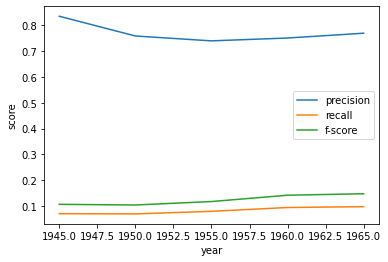

In [27]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(_range, precision_year, label='precision')  # Plot some data on the axes.
ax.plot(_range, recall_year, label='recall')  # Plot more data on the axes...
ax.plot(_range, fscore_year, label='f-score')  # ... and some more.

ax.set_xlabel('year')  # Add an x-label to the axes.
ax.set_ylabel('score')  # Add a y-label to the axes.
ax.legend()  # Add a legend
plt.savefig('plot/antract_facerec_precision_year.pdf')  

In [ ]:
widgets.interact(filter_by('year'), what=widgets.Dropdown(
    options=sorted(df_dataset['year'].unique()),
    description='Year:',
));

In [ ]:
widgets.interact(filter_by('media'), what=widgets.Dropdown(
    options=sorted(df_dataset['media'].unique()),
    description='Media:',
));

# Co-occurrence matrix

In [18]:
from itertools import combinations

l = len(classes)
matrix = np.zeros((l,l))

for x, y in combinations(np.arange(l), 2):
    px = classes[x]
    py = classes[y]
    
    sx = df_dataset[df_dataset['predicted'] == px]
    sy = df_dataset[df_dataset['predicted'] == py]
    
    sx_media = sx['media'].to_dict()
    sy_media = sy['media'].to_dict()
    
    sx2 = sx[sx['media'].isin(sy['media'])]
    sy2 = sy[sy['media'].isin(sx['media'])]
    
    matrix[x][y] = len(sx2)
    matrix[y][x] = len(sy2)

In [19]:
[c for c in classes if c.startswith('J')]

['Juin , Alphonse',
 'Jazy , Michel',
 'Jacquinot , Louis',
 'Joxe , Louis',
 'Jeanneney , Jean Marcel',
 'Jouhaux , Léon',
 'Jean XXIII',
 'Juliana des Pays Bas']

In [21]:
import math

In [22]:
cls = [x.replace(' S.', '') for x in classes]
l = len(cls)
matrix = np.zeros((l,l))
matrix_age = np.zeros((100,100))

def get_age_from_dt(x, year):
    date = df[df['name'] == x]['date'].tolist()[0]

    if math.isnan(date):
        return 0

    return int(int(year) - int(date))


d = 120
for dt in data:
    cur = None
    years = df_dataset[df_dataset['media']==dt['media']]['year'].tolist()
    year = years[0] if len(years) > 0 else None

    
    useful_tracks = [t for t in dt['tracks'] if t['name']!= '0.0']
    for t in useful_tracks:
        if t['name'] not in cls:
            continue
        
        if cur is None:
            cur = t
            continue

        if t['name'] == cur['name']:
            cur = t
            continue
        
        s = t['start_npt']
        cs = cur['start_npt']
        e = t['end_npt']
        ce = cur['end_npt']
        
        ist = set(np.arange(start=s-d,stop=e+d)).intersection(set(np.arange(start=cs-d, stop=ce+d)))
        if len(ist) > 0:
            px = cls.index(t['name'])
            py = cls.index(cur['name'])
            matrix[px,py] += 1
            
            if year is not None:
                ax = get_age_from_dt(t['name'], year)
                ay = get_age_from_dt(cur['name'], year)

                matrix_age[ax, ay] += 1
        
        cur = t

In [23]:
mat = np.matrix(matrix_age)
dfx = pd.DataFrame(data=mat.astype(int))
dfx.to_csv('matrix_age.csv', sep=' ', header=False, float_format='%.2f', index=False)

In [29]:
meet_people = []

occupation_cls = df['occupation'].unique().tolist()
occupation_matrix = np.zeros((len(occupation_cls), len(occupation_cls)))

for i, x in enumerate(cls):
    for j, y in enumerate(cls):
        if j <= i:
            continue
        if matrix[i,j] > 0:
            roleX = df[df['name'] == x]['occupation'].tolist()[0]
            roleY = df[df['name'] == y]['occupation'].tolist()[0]
            occupation_matrix[occupation_cls.index(roleX), occupation_cls.index(roleY)] += 1
            
#             sex	note	isni	wd	nationality	date	occupation
            meet_people.append({'who1':x, 'who2':y, 'times':matrix[i,j]})
            
pd.DataFrame.from_dict(meet_people)

who1                                who2  \
0                   Gaulle , Charles de                      Debré , Michel   
1                   Gaulle , Charles de                  Pompidou , Georges   
2                   Gaulle , Charles de                    Gromyko , Andreï   
3                   Gaulle , Charles de                      Perillat , Guy   
4                   Gaulle , Charles de           Kennedy , John Fitzgerald   
5                   Gaulle , Charles de                    Holleaux , André   
6                      Auriol , Vincent                   Bidault , Georges   
7                      Auriol , Vincent         Lamine , Pacha Sidi Mohamed   
8                      Auriol , Vincent                   Pflimlin , Pierre   
9                      Auriol , Vincent                       Chou , En Lai   
10                  Philip d' Edimbourg                        Elizabeth II   
11                  Philip d' Edimbourg                Elizabeth-Reine Mère   
12                  Philip d' Edimbourg                     Wilson , Harold   
13                         Elizabeth II                         Coty , René   
14                         Elizabeth II                Goitschel , Marielle   
15                         Elizabeth II                Juliana des Pays Bas   
16                     Schuman , Robert                  Spaak , Paul Henri   
17                     Schuman , Robert           Marshall , George Catlett   
18                     Schuman , Robert                 Caffery , Jefferson   
19                          Coty , René                       Pleven , René   
20                          Coty , René                      Eden , Anthony   
21                          Coty , René                  Pompidou , Georges   
22                          Coty , René                  Le Troquer , André   
23                          Coty , René              Mendès France , Pierre   
24                          Coty , René                       Chou , En Lai   
25            Eisenhower , Dwight David                  Nehru , Jawaharlal   
26            Eisenhower , Dwight David                     Nixon , Richard   
27            Eisenhower , Dwight David  Leclerc de Hauteclocque , Philippe   
28            Eisenhower , Dwight David                      Schaer , Fritz   
29                Khrouchtchev , Nikita                     Cerdan , Marcel   
30                Khrouchtchev , Nikita                     Nixon , Richard   
31                Khrouchtchev , Nikita           Kennedy , John Fitzgerald   
32                Khrouchtchev , Nikita                    Brejnev , Leonid   
33                Khrouchtchev , Nikita                      Buron , Robert   
34                Khrouchtchev , Nikita            Fourre Cormeray , Michel   
35                       Truman , Harry                       Marais , Jean   
36                       Truman , Harry           Marshall , George Catlett   
37                       Truman , Harry                     Nixon , Richard   
38                       Truman , Harry            Attlee , Clément Richard   
39                       Truman , Harry                    Holleaux , André   
40          Couve de Murville , Maurice                  Pompidou , Georges   
41          Couve de Murville , Maurice                  Hailé Sélassié Ier   
42                    Adenauer , Konrad                       Marais , Jean   
43                    Adenauer , Konrad              Mendès France , Pierre   
44                       Debré , Michel                  Pompidou , Georges   
45                    Auriol , Michelle              Mendès France , Pierre   
46                    Auriol , Michelle                           Fernandel   
47                    Auriol , Michelle                             Bao Dai   
48              Chaban Delmas , Jacques                     Mao , Tsé Toung   
49                  Churchill , Winston                       Chou , En Lai   
50    

In [30]:
mat = np.matrix(matrix)
df = pd.DataFrame(data=mat.astype(int))
df.to_csv('matrix.csv', sep=' ', header=False, float_format='%.2f', index=False)

In [31]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

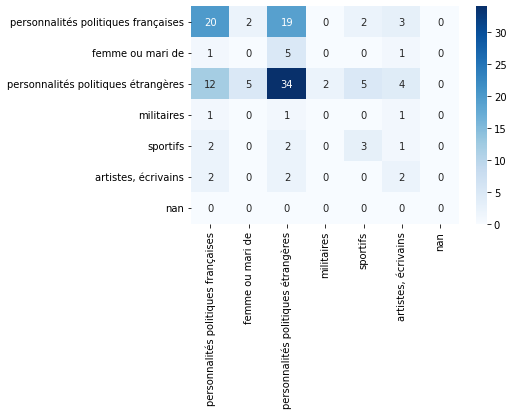

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(occupation_matrix, annot=True, fmt="g", cmap=sns.color_palette("Blues", as_cmap=True),
           xticklabels=occupation_cls, yticklabels=occupation_cls)
plt.show()

In [33]:
meet_occupations = []

for i, x in enumerate(occupation_cls):
    for j, y in enumerate(occupation_cls):
        if j < i:
            continue
        if occupation_matrix[i,j] > 0:
            meet_occupations.append({'who1':x, 'who2':y, 'times':occupation_matrix[i,j]})
            
pd.DataFrame.from_dict(meet_occupations)

who1                                 who2  \
0   personnalités politiques françaises  personnalités politiques françaises   
1   personnalités politiques françaises                     femme ou mari de   
2   personnalités politiques françaises  personnalités politiques étrangères   
3   personnalités politiques françaises                             sportifs   
4   personnalités politiques françaises                  artistes, écrivains   
5                      femme ou mari de  personnalités politiques étrangères   
6                      femme ou mari de                  artistes, écrivains   
7   personnalités politiques étrangères  personnalités politiques étrangères   
8   personnalités politiques étrangères                           militaires   
9   personnalités politiques étrangères                             sportifs   
10  personnalités politiques étrangères                  artistes, écrivains   
11                           militaires                  artistes, écrivains   
12                             sportifs                             sportifs   
13                             sportifs                  artistes, écrivains   
14                  artistes, écrivains                  artistes, écrivains   

    times  
0    20.0  
1     2.0  
2    19.0  
3     2.0  
4     3.0  
5     5.0  
6     1.0  
7    34.0  
8     2.0  
9     5.0  
10    4.0  
11    1.0  
12    3.0  
13    1.0  
14    2.0